# Trabalho de _Machine Learning_
## Autores: Iúri Brandão e Júlio Scopel
### Para maiores detalhes sobre o notebook, ver README.md no repositório.

## Importação das Bibliotecas Necessárias

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Classificadores e relatórios:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

# Bibliotecas utilizadas para teste foram comentadas:
#import xgboost
#from sklearn import metrics
#from sklearn.metrics import accuracy_score
#from sklearn import svm

## Iniciando a análise exploratória do dataset

In [159]:
arquivo = 'diabetes.csv'

diabetes = pd.read_csv(arquivo)

#Para exibir as 5 primeiras linhas do df - se não tiver argumento:
diabetes.head(10).T

,0,1,2,3,4,5,6,7,8,9
Pregnancies,6.000,1.000,8.000,1.000,0.000,5.000,3.000,10.000,2.000,8.000
Glucose,148.000,85.000,183.000,89.000,137.000,116.000,78.000,115.000,197.000,125.000
BloodPressure,72.000,66.000,64.000,66.000,40.000,74.000,50.000,0.000,70.000,96.000
SkinThickness,35.000,29.000,0.000,23.000,35.000,0.000,32.000,0.000,45.000,0.000
Insulin,0.000,0.000,0.000,94.000,168.000,0.000,88.000,0.000,543.000,0.000
BMI,33.600,26.600,23.300,28.100,43.100,25.600,31.000,35.300,30.500,0.000
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288,0.201,0.248,0.134,0.158,0.232
Age,50.000,31.000,32.000,21.000,33.000,30.000,26.000,29.000,53.000,54.000
Outcome,1.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000


In [160]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [161]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Ponto de atenção:** As varíaveis **glicose, pressão sanguínea, espessura de pele e insulina possuem valores zerados**, o que não correspondem à realidade. Isso será tratado adiante.

Text(0.5, 1.0, 'Total de Amostras Sem e Com Diabetes (Outcome 0 e 1)')

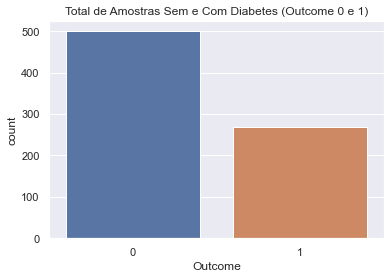

In [162]:
# Verificação de quantas amostras no dataset são de pessoas com ou sem diabetes (Outcome = 1 ou 0):

sns.set(style="darkgrid")
sns.countplot(x=diabetes['Outcome']).set_title('Total de Amostras Sem e Com Diabetes (Outcome 0 e 1)')

### Considerando que nenhum dos registros possui dados nulos, faremos uma análise da relação das variáveis:

In [163]:
corr = diabetes.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


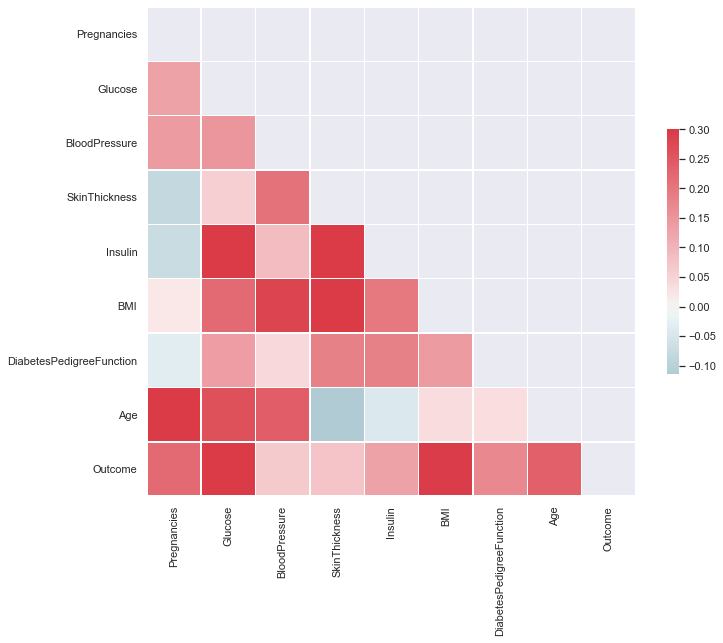

In [164]:
# Fonte: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Gráficos a serem utilizados na análise exploratória (*avaliar a utilização*):

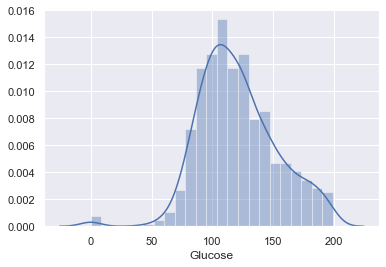

In [165]:
sns.distplot(diabetes['Glucose'])

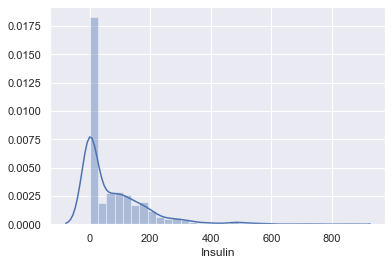

In [166]:
sns.distplot(diabetes['Insulin'])

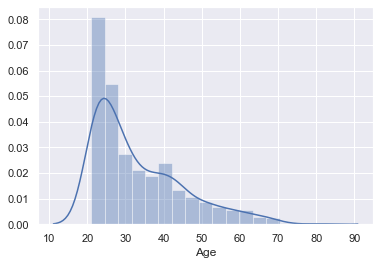

In [167]:
sns.distplot(diabetes['Age'])

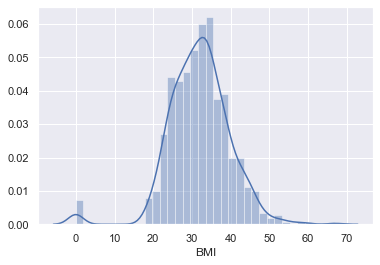

In [168]:
sns.distplot(diabetes['BMI'])

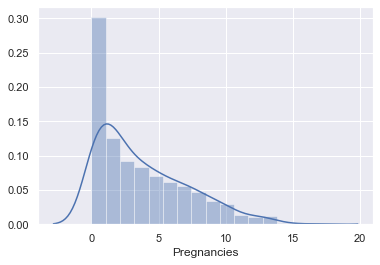

In [169]:
sns.distplot(diabetes['Pregnancies'])

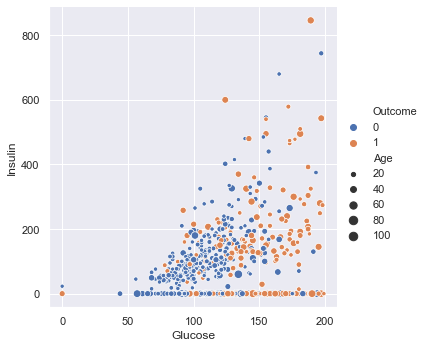

In [170]:
sns.relplot(x="Glucose", y="Insulin", hue="Outcome", size="Age", data=diabetes, legend='brief')

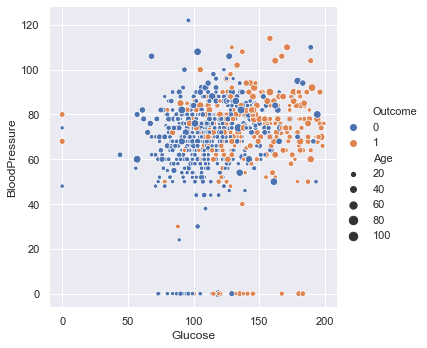

In [171]:
sns.relplot(x="Glucose", y="BloodPressure", hue="Outcome", size="Age", data=diabetes, legend='brief')

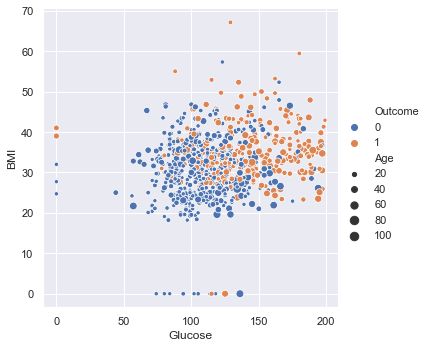

In [172]:
sns.relplot(x="Glucose", y="BMI", hue="Outcome", size="Age", data=diabetes, legend='brief')

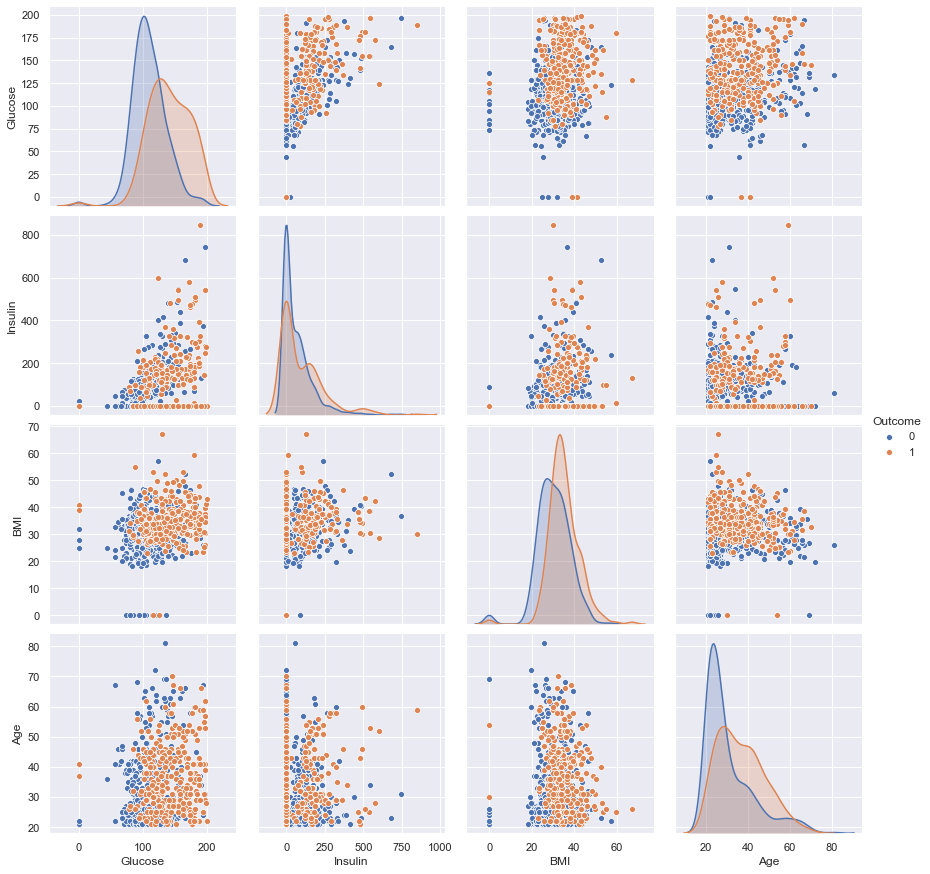

In [173]:
# Visualização das relações de características, destacando "Outcome" (resultado):
#sns.pairplot(diabetes, hue="Outcome")

sns.pairplot(diabetes, height=3, vars=["Glucose", "Insulin", "BMI", "Age"], hue="Outcome")
#sns.pairplot(diabetes, height=3, vars=["Glucose", "Insulin", "BMI", "Age", "SkinThickness"], hue="Outcome")

##  NORMALIZAÇÃO DOS DADOS

In [174]:
df_preditores = diabetes.drop(['Outcome'],axis = 1)

# Instancia o MaxAbsScaler
p=MaxAbsScaler()

# Analisa os dados e prepara o padronizador
p.fit(df_preditores)

# Analisa os dados e prepara o padronizador
df_normalizado = p.transform(df_preditores)
diabetes_normalizado = pd.DataFrame(df_normalizado, columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
diabetes_normalizado['Outcome'] = diabetes['Outcome']

#Dataset normalizado
diabetes_normalizado

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.069008,0.259259,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.945455,0.407407,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.070661,0.777778,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.140496,0.333333,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.101240,0.370370,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.144215,0.580247,1


##  IMPORTÂNCIA DE CADA ATRIBUTO

Feature ranking:
1. feature 1 (0.358695)
2. feature 5 (0.179856)
3. feature 7 (0.148859)
4. feature 6 (0.087590)
5. feature 0 (0.075946)
6. feature 4 (0.058149)
7. feature 2 (0.046914)
8. feature 3 (0.043992)


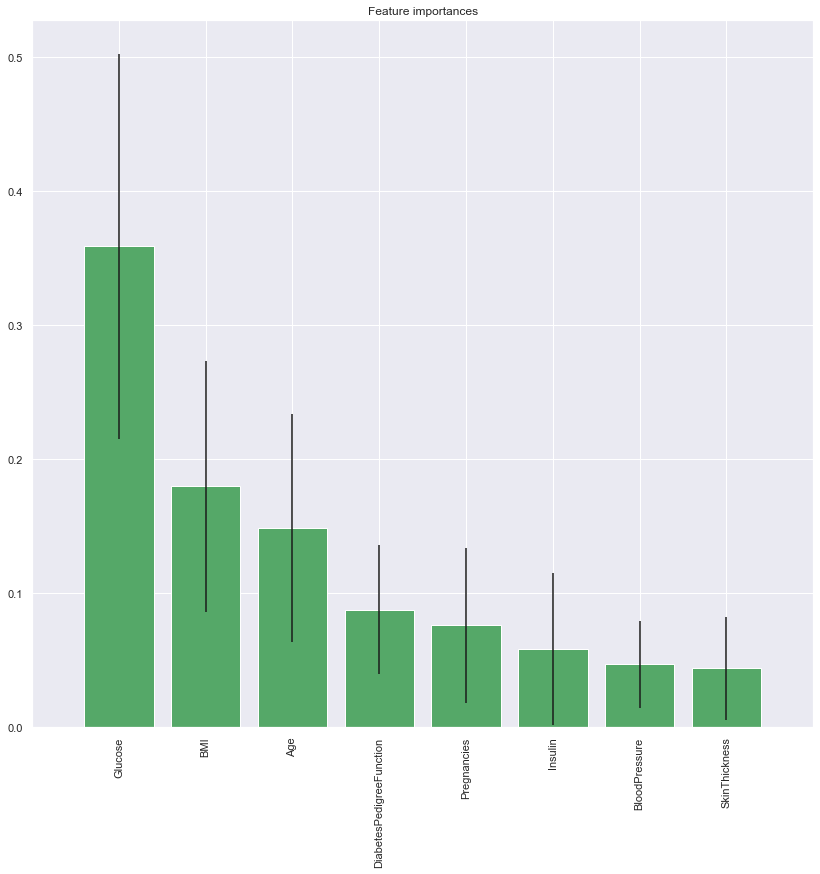

In [175]:
# URL base: https://medium.com/@dspaulolima/encontrando-atributos-mais-importantes-em-dados-de-diabetes-b39d644c275c

# UTILIZANDO RANDOM FOREST PARA ENCONTRAR IMPORTÂNCIA DOS ATRIBUTOS

var_pred = diabetes_normalizado.drop(columns='Outcome')
var_target = diabetes_normalizado.Outcome

rfclf = RandomForestClassifier(n_estimators=100, max_depth=5)
rfclf = rfclf.fit(var_pred,var_target)

importances = rfclf.feature_importances_

std = np.std([tree.feature_importances_ for tree in rfclf.estimators_], axis=0)

indices = np.argsort(importances)[::-1]

# IMPRIMINDO RANKING DOS ATRIBUTOS
print("Feature ranking:")

for f in range(var_pred.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# PLOTAGEM DAS IMPORTÂNCIAS
plt.figure(1, figsize=(14, 13))

plt.title("Feature importances")
plt.bar(range(var_pred.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")

plt.xticks(range(var_pred.shape[1]), var_pred.columns[indices],rotation=90)
plt.xlim([-1, var_pred.shape[1]])
plt.show()

## Separação do _dataset_ em treino e teste, para construção e execução dos modelos:

In [176]:
#Split arrays or matrices into random train and test subsets
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

# A variável X conterá a coluna Outcome, e y terá o DataFrame menos a coluna que é nosso "target":
X = diabetes_normalizado.drop(['Outcome'], axis=1)
y = diabetes_normalizado.Outcome # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=314)

## Criando os modelos e adicionando-os a um _array_

In [177]:
# Os modelos comentados foram utilizados a título de comparação, deixando disponíveis para
# utilização futura no código:
classifiers = []

#model1 = xgboost.XGBClassifier()
#classifiers.append(model1)

model1 = GaussianNB()
classifiers.append(model1)

#model2 = svm.SVC()
#classifiers.append(model2)

model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)

model4 = RandomForestClassifier()
classifiers.append(model4)

#model5 = LinearDiscriminantAnalysis()
#classifiers.append(model5)

#model6 = KNeighborsClassifier(3)
#classifiers.append(model6)

In [178]:
# Exibindo o conteúdo do array:
classifiers

[GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()]

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.72      0.57      0.64        51

    accuracy                           0.79       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154


*** Confusion Matrix of GaussianNB() ***


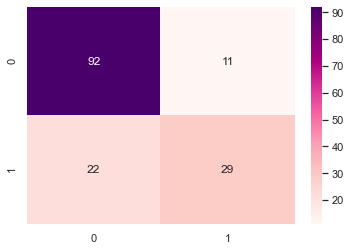

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       103
           1       0.53      0.47      0.50        51

    accuracy                           0.69       154
   macro avg       0.64      0.63      0.64       154
weighted avg       0.68      0.69      0.68       154


*** Confusion Matrix of DecisionTreeClassifier() ***


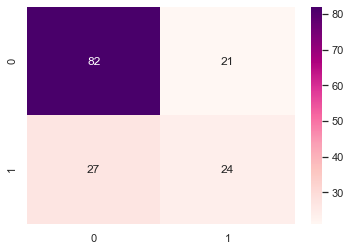

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       103
           1       0.78      0.49      0.60        51

    accuracy                           0.79       154
   macro avg       0.78      0.71      0.73       154
weighted avg       0.79      0.79      0.77       154


*** Confusion Matrix of RandomForestClassifier() ***


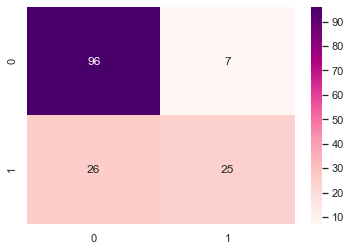

In [179]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Considerando a utilização do "classification_report", a acurácia será comentada:
    #acc = accuracy_score(y_test, y_pred)
    #print("Accuracy of %s is %s"%(clf, acc))
    
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    
    #print("Confusion Matrix of %s is %s"%(clf, cm))
    
    print('\n*** Confusion Matrix of %s ***'%(clf))
    sns.heatmap(cm, annot=True, cmap='RdPu')
    plt.show()